In [1]:
import os.path

import pandas as pd
import matplotlib.pyplot as plt

# Hypothesis 2:
# Development trends for different electric vehicles are inconsistent. Tesla always possesses the most progressive models in the EV market.

In [104]:
wa_df = pd.read_csv('data/wa_ev_registrations_public.csv')
wa_df.head(10)

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Vehicle ID,ZIP Code,Registration Valid Date,VIN Prefix,VIN Model Year,DMV ID,DMV ID Complete,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name,Technology
0,WA-047-134958694,98012,2022-03-16,5YJ3E1EC,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model 3,BEV
1,WA-047-276610085,98664,2022-03-16,JA4J24A5,J,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Mitsubishi Outlander Plug In,PHEV
2,WA-047-192782285,98020,2022-03-16,7SAYGAEE,N,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV
3,WA-047-179410703,98029,2022-03-16,LPSED3KA,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Polestar 2,BEV
4,WA-047-171474537,98004,2022-03-16,WP0AB2Y1,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Porsche Taycan,BEV
5,WA-047-167179218,98052,2022-03-16,5YJYGDEE,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV
6,WA-047-150981162,98144,2022-03-16,5YJ3E1EA,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model 3,BEV
7,WA-047-172915263,98380,2022-03-16,5YJYGDEE,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV
8,WA-047-109791832,98020,2022-03-16,KNDJX3AE,J,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Kia Soul EV,BEV
9,WA-047-475452540,98040,2022-03-16,1N4AZ1CP,J,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Nissan Leaf,BEV


### Data Pre-Processing for Dataframe

In [110]:
def preprocess_dataframe(df: pd.DataFrame, date: []) -> tuple:
    """ Pre-process the dataframe, add some valid columns for later operation, and count for recent data

    :param df: the dataframe that need to be processed
    :param date: a list for the beginning date we count for recently data, each three elements represent year, month and day
    :return tuple of (df, df_recently) in which - df: the dataframe after process,
    df_recently: the recently dataframe beginning from the date

    >>> wa_test = pd.read_csv('data/wa_test.csv')
    >>> test, test_recently = preprocess_dataframe(wa_test, [2012, 12, 31])
    >>> 'Valid Datetime' in test and 'Valid Month' in test and 'Valid Quarter' in test
    True
    >>> 'Dynamic Type' in test
    True
    >>> test_recently[test_recently['Valid Datetime'] < pd.Timestamp(2012, 12, 31)].count()
    0
    """
    df['Valid Datetime'] = pd.to_datetime(df['Registration Valid Date'])
    df['Valid Month'] = df['Registration Valid Date'].str[:7]
    df['Valid Quarter'] = pd.PeriodIndex(df['Valid Datetime'], freq='Q')
    df['Valid Year'] = df['Registration Valid Date'].str[:4]
    # count the Dynamic Type(Technology) for BEV/PHEV
    df['Dynamic Type'] = df['Technology'].apply(lambda x: 1 if x == 'BEV' else 0)

    assert max(df['Valid Datetime']) > pd.Timestamp(2015, 1, 1)
    df_recently = df[df['Valid Datetime'] >= pd.Timestamp(date[0], date[1], date[2])]
    return df, df_recently

wa_df, wa_df_recently = preprocess_dataframe(wa_df, [2015, 1, 1])
print(wa_df.head(10))

         Vehicle ID ZIP Code Registration Valid Date VIN Prefix  \
0  WA-047-134958694    98012              2022-03-16   5YJ3E1EC   
1  WA-047-276610085    98664              2022-03-16   JA4J24A5   
2  WA-047-192782285    98020              2022-03-16   7SAYGAEE   
3  WA-047-179410703    98029              2022-03-16   LPSED3KA   
4  WA-047-171474537    98004              2022-03-16   WP0AB2Y1   
5  WA-047-167179218    98052              2022-03-16   5YJYGDEE   
6  WA-047-150981162    98144              2022-03-16   5YJ3E1EA   
7  WA-047-172915263    98380              2022-03-16   5YJYGDEE   
8  WA-047-109791832    98020              2022-03-16   KNDJX3AE   
9  WA-047-475452540    98040              2022-03-16   1N4AZ1CP   

  VIN Model Year  DMV ID DMV ID Complete               DMV Snapshot  \
0              M      47            WA47  WA DMV Direct (3/16/2022)   
1              J      47            WA47  WA DMV Direct (3/16/2022)   
2              N      47            WA47  WA DMV 

#### show the earliest and latest registration date, which also represents the data capture time period

In [111]:
min(wa_df['Valid Datetime']), max(wa_df['Valid Datetime']), min(wa_df_recently['Valid Datetime']), max(wa_df_recently['Valid Datetime'])

(Timestamp('2010-01-06 00:00:00'),
 Timestamp('2022-03-16 00:00:00'),
 Timestamp('2015-01-02 00:00:00'),
 Timestamp('2022-03-16 00:00:00'))

In [112]:
def get_monthly_report(df: pd.DataFrame) -> pd.DataFrame:
    """ get the dataframe containing resorted by each month

    :param df: dataframe
    :return: resorted dataframe with month
    """
    df_month = df.groupby(['Valid Month'])\
        .agg({'DMV ID': 'count', 'Dynamic Type': 'sum'}).reset_index()\
        .rename(columns={'DMV ID': 'Vehicles Total Number', 'Dynamic Type': 'BEV Number'})

    df_month['PHEV Number'] = df_month['Vehicles Total Number'] - df_month['BEV Number']
    return df_month

wa_df_month = get_monthly_report(wa_df)
print(wa_df_month)

    Valid Month  Vehicles Total Number  BEV Number  PHEV Number
0       2010-01                      1           1            0
1       2010-02                      5           5            0
2       2010-03                     13          13            0
3       2010-04                      9           9            0
4       2010-05                      7           7            0
..          ...                    ...         ...          ...
138     2021-11                  81787       60258        21529
139     2021-12                  83621       61811        21810
140     2022-01                  84762       62758        22004
141     2022-02                  84762       62758        22004
142     2022-03                  88903       66305        22598

[143 rows x 4 columns]


In [131]:
def draw_month_report(df_month: pd.DataFrame) -> None:
    """ draw the month curve report

    :param df_month: the dataframe contains the registration month information
    :return: None (showing plots)
    """
    df_month.plot(x='Valid Month', y={'PHEV Number', 'BEV Number'}, kind='line', figsize=(10, 5), grid=True)
    df_month[df_month['Valid Month'].str.startswith('202')].plot(x='Valid Month', y={'PHEV Number', 'BEV Number'}, kind='line', figsize=(10, 5), grid=True)

    df_month[df_month['Valid Month'].str.startswith('202')].plot(x='Valid Month', y={'PHEV Number', 'BEV Number'}, kind='bar', stacked=True, figsize=(10, 5))
    plt.show()

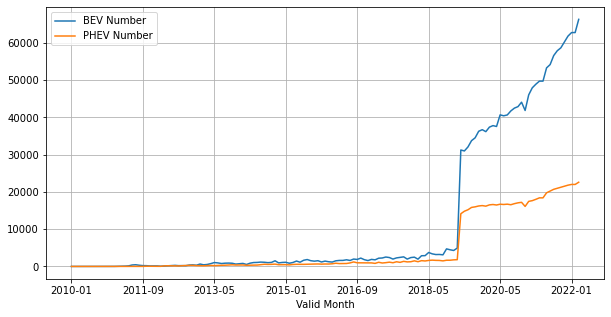

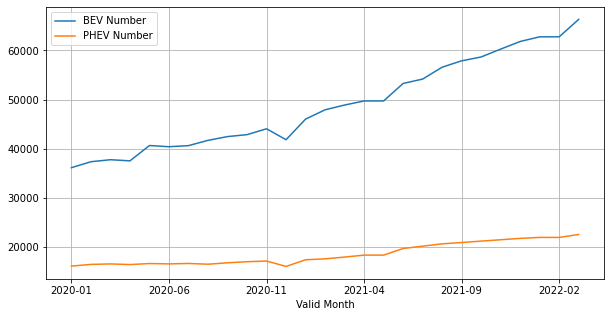

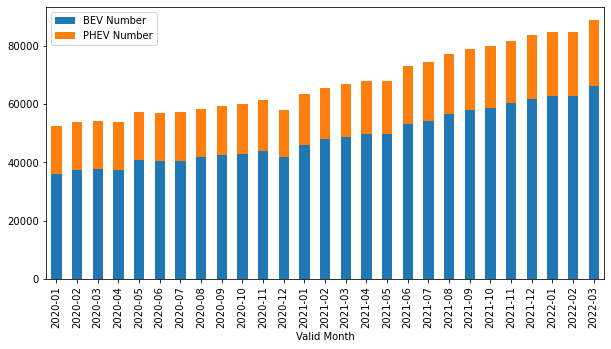

In [132]:
draw_month_report(wa_df_month)

According to the plot, EV developed very slowly before 2018 in WA. However, early in 2019, there occurred a huge boost in the EV market. The curve goes up to about four or five times each month, and immediately the registration number goes beyond 10 thousand and 30 thousand separately. From that time, BEV became the majority part of Electric Vehicle, and the Rising curve is steeper than the PHEV, it accounts for about 70% of the market. After that, the curve tends to be steady and the volatility can be ignored.
In this way, we can say that both PHEV and BEV have different trends in different years.

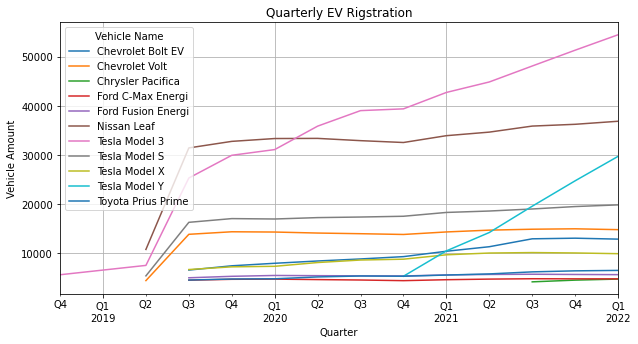

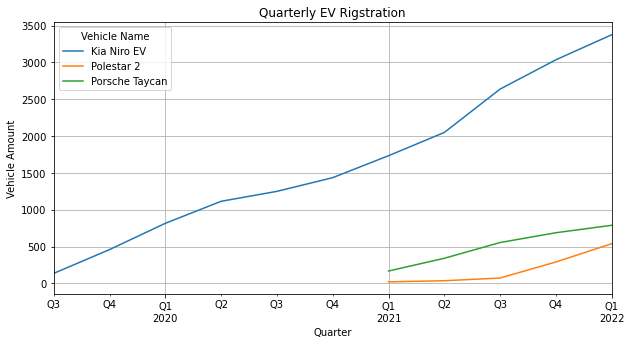

In [133]:
# draw multiple car quarterly data
def draw_vehicle_quarterly_data(df: pd.DataFrame, car_list: [], min_amount=0) -> None:
    """ draw certain car's development trend whose registration number is above min_amount

    :param df: dataframe of registration record
    :param car_list: list of the searching car make
    :param min_amount: minimum car registration number that is taken into consideration
    :return: None
    """
    df_quarter = df.groupby(['Vehicle Name', 'Valid Quarter'])\
        .agg({'DMV ID': 'count'}).reset_index()\
        .rename(columns={'DMV ID': 'Vehicles Amount'})
    if len(car_list) > 0:
        df_quarter = df_quarter[df_quarter['Vehicle Name'].isin(car_list)]
    df_quarter = df_quarter[df_quarter['Vehicles Amount'] >= min_amount]
    df_pivot_car_in_quarter = pd.pivot(df_quarter, index='Valid Quarter', columns='Vehicle Name', values='Vehicles Amount')
    df_pivot_car_in_quarter.plot(figsize=(10, 5), title='Quarterly EV Rigstration', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')
    plt.show()

draw_vehicle_quarterly_data(wa_df, [], 4000)
draw_vehicle_quarterly_data(wa_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])

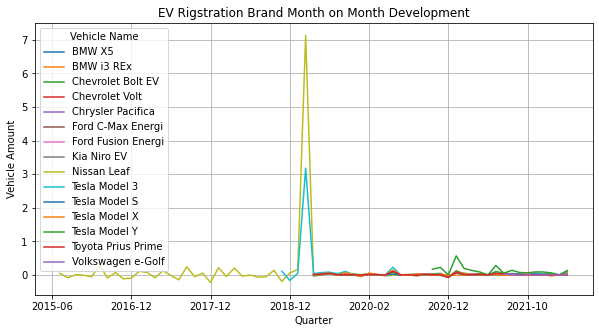

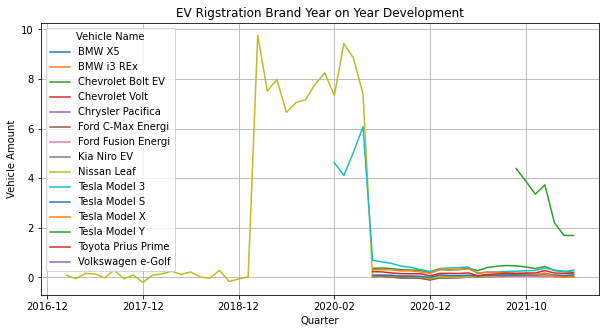

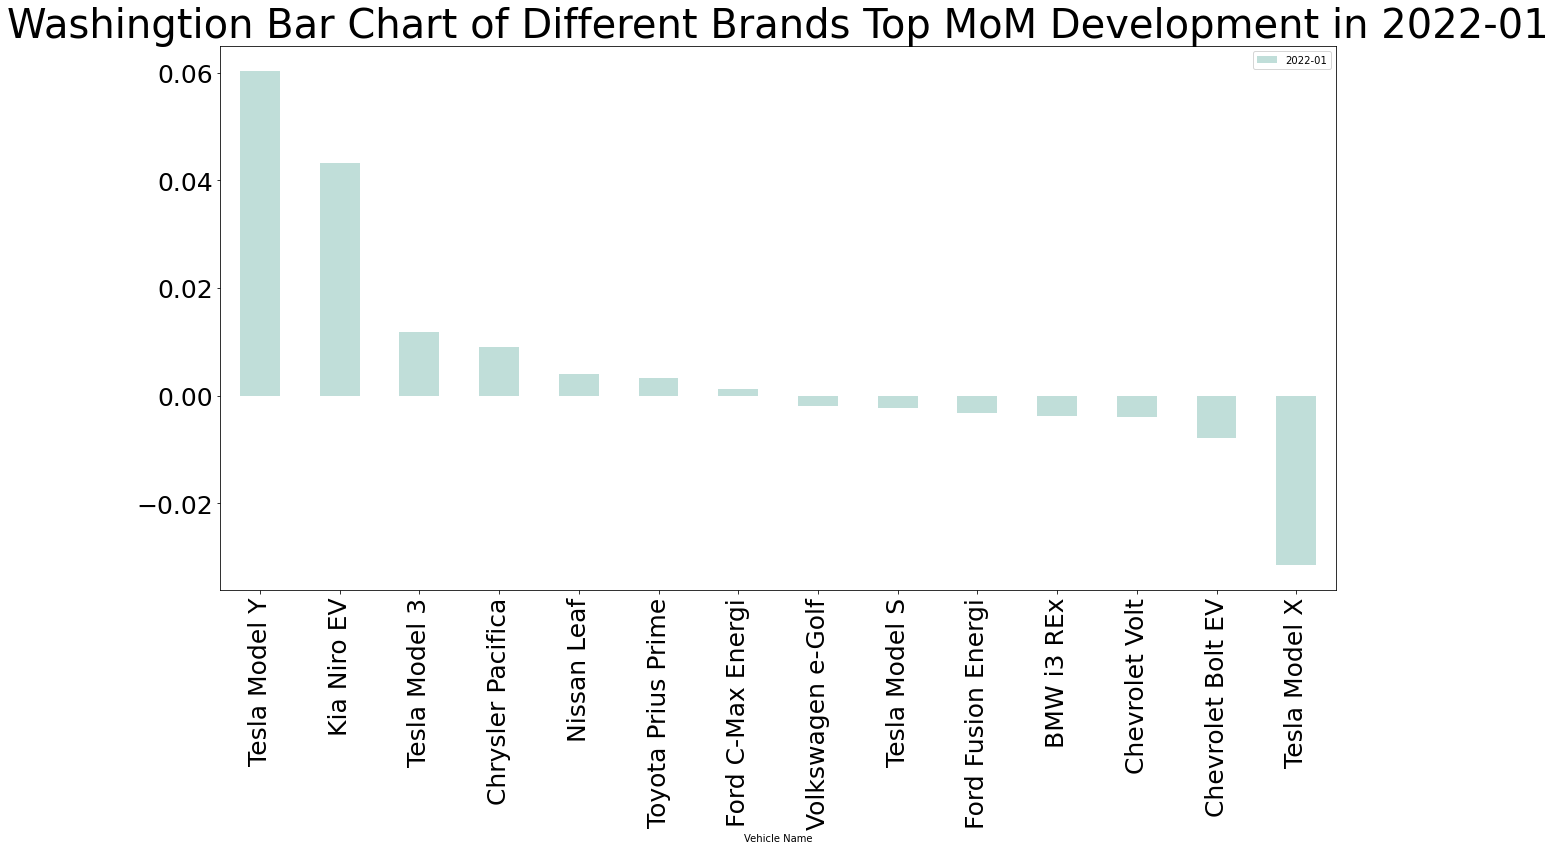

In [134]:
def plot_mom(df_recently: pd.DataFrame, search_month: str, min_count, state_name: str) -> None:
    """ Draw three plot (2 curve and 1 bar plot) of models rank in certain month

    :param df_recently: the dataframe of recent registration
    :param search_month: the searching month
    :param min_count: the minimum registration count in the month which is valid
    :param state_name: the searching state name
    :return: None (showing three plots)
    """
    df_month = df_recently.groupby(['Vehicle Name', 'Valid Month'])\
            .agg({'DMV ID': 'count'}).reset_index()\
            .rename(columns={'DMV ID': 'Vehicles Amount'})
    df_month = df_month[df_month['Vehicles Amount'] >= min_count]
    df_pivot_car_in_month = pd.pivot(df_month, index='Valid Month', columns='Vehicle Name', values='Vehicles Amount')

    # Month-on-Month & Year-on-Year
    df_ev_MoM = df_pivot_car_in_month.transform(func = lambda x : x.pct_change(periods=1))
    df_ev_YoY = df_pivot_car_in_month.transform(func = lambda x : x.pct_change(periods=12))

    df_ev_MoM.plot(figsize=(10, 5), title='EV Rigstration Brand Month on Month Development', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')
    df_ev_YoY.plot(figsize=(10, 5), title='EV Rigstration Brand Year on Year Development', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')

    df_ev_MoM_T = df_ev_MoM.T
    df_ev_MoM_T.sort_values(by=search_month, inplace = True, ascending=False)
    df_ev_MoM_T = df_ev_MoM_T[df_ev_MoM_T[search_month].notna()]
    fig = df_ev_MoM_T.plot.bar(figsize=(20, 10), fontsize=25, y=search_month, color='#c0ded9',
                                 title=state_name + ' Bar Chart of Different Brands Top MoM Development' + ' in ' + search_month)
    fig.axes.title.set_size(40)

plot_mom(wa_df_recently, '2022-01', 1000, 'Washingtion')

We rank all the valid car models by descending order. Regarding Washington State, Tesla Model X and Model 3 are the top two models with the highest increase ratio in March of 2020 while Tesla Model Y and Model 3 are the top two. As time goes by, the dominance of Model 3 has changed because of new models’ arrival.

### New York State

In [135]:
ny_df = pd.read_csv('data/ny_ev_registrations_public.csv')
ny_df.head(10)

,ZIP Code,Registration Valid Date,VIN Prefix,DMV ID,DMV Snapshot,VIN Model Year,Registration Expiration Date,State,Vehicle Name,Technology
0,11797,2020-02-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-12-19,NY,Tesla Model X,BEV
1,11215,2018-09-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-20,NY,Tesla Model X,BEV
2,11040,2018-12-03,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2021-01-08,NY,Tesla Model X,BEV
3,11215,2018-09-30,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-29,NY,Tesla Model X,BEV
4,11976,2018-09-11,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-09,NY,Tesla Model X,BEV
5,10024,2018-08-08,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-07,NY,Tesla Model X,BEV
6,11231,2018-06-28,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV
7,12501,2018-09-17,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV
8,11720,2018-06-29,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-28,NY,Tesla Model X,BEV
9,14202,2018-06-28,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV


In [136]:
ny_df, ny_df_recently = preprocess_dataframe(ny_df, [2015, 1, 1])
ny_df_month = get_monthly_report(ny_df)

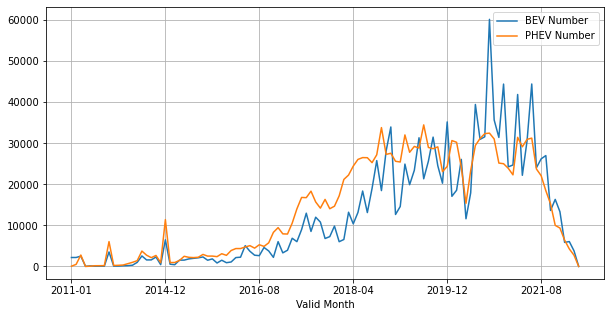

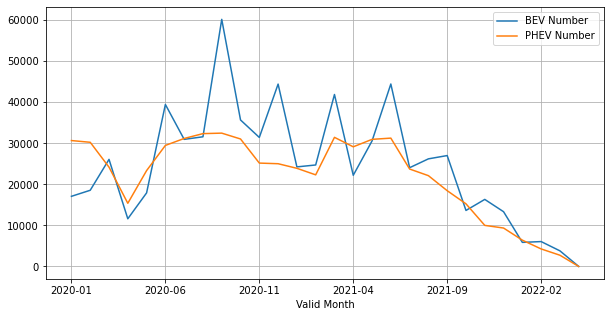

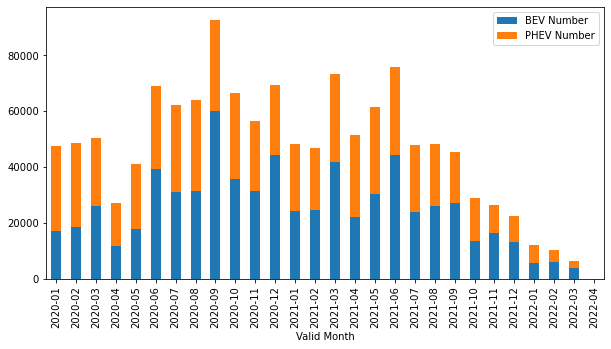

In [137]:
draw_month_report(ny_df_month)

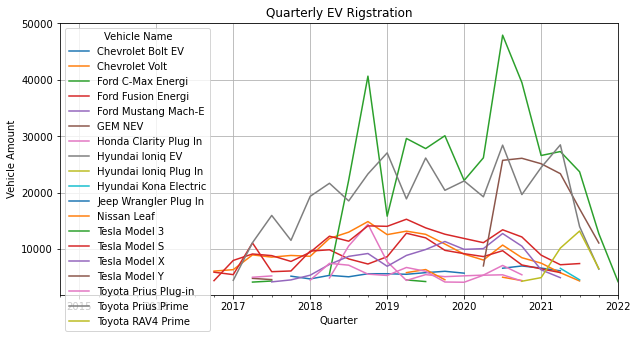

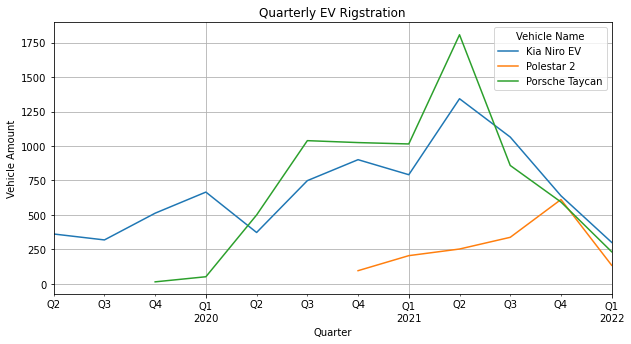

In [138]:
draw_vehicle_quarterly_data(ny_df, [], 4000)
draw_vehicle_quarterly_data(ny_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])

From the plot, we can see that most popular registered car is Tesla Model 3 in NY, Toyota Prius Prime is the second, and the third one is Tesla Model Y. Among all of them, the most craggy curve is Tesla Model 3. The reason I think it’s because it's the most popular EV brand among young people, and Tesla’s director Elon Musk did a lot of advertisements on social media and the Internet. so the decisions made by the customers are always due to their personal preferences and brand mania.

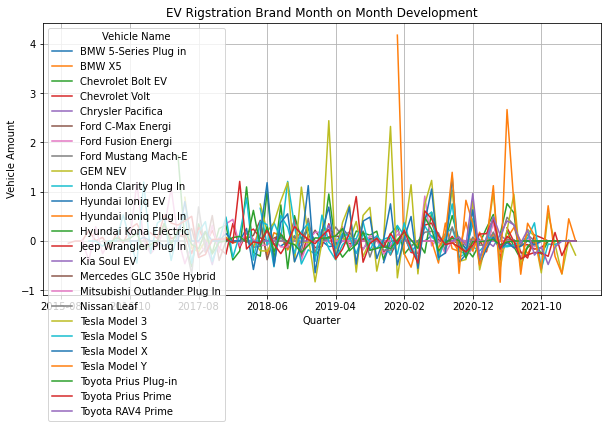

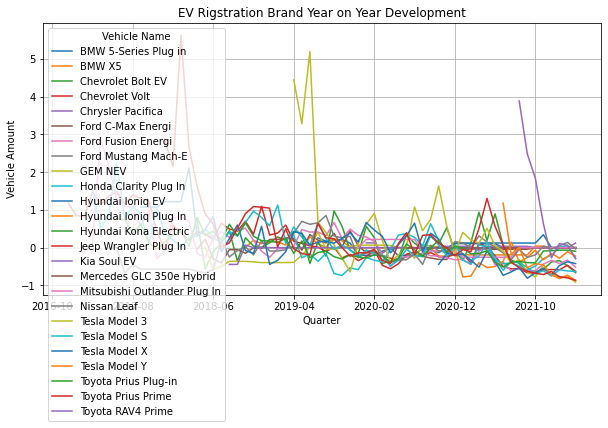

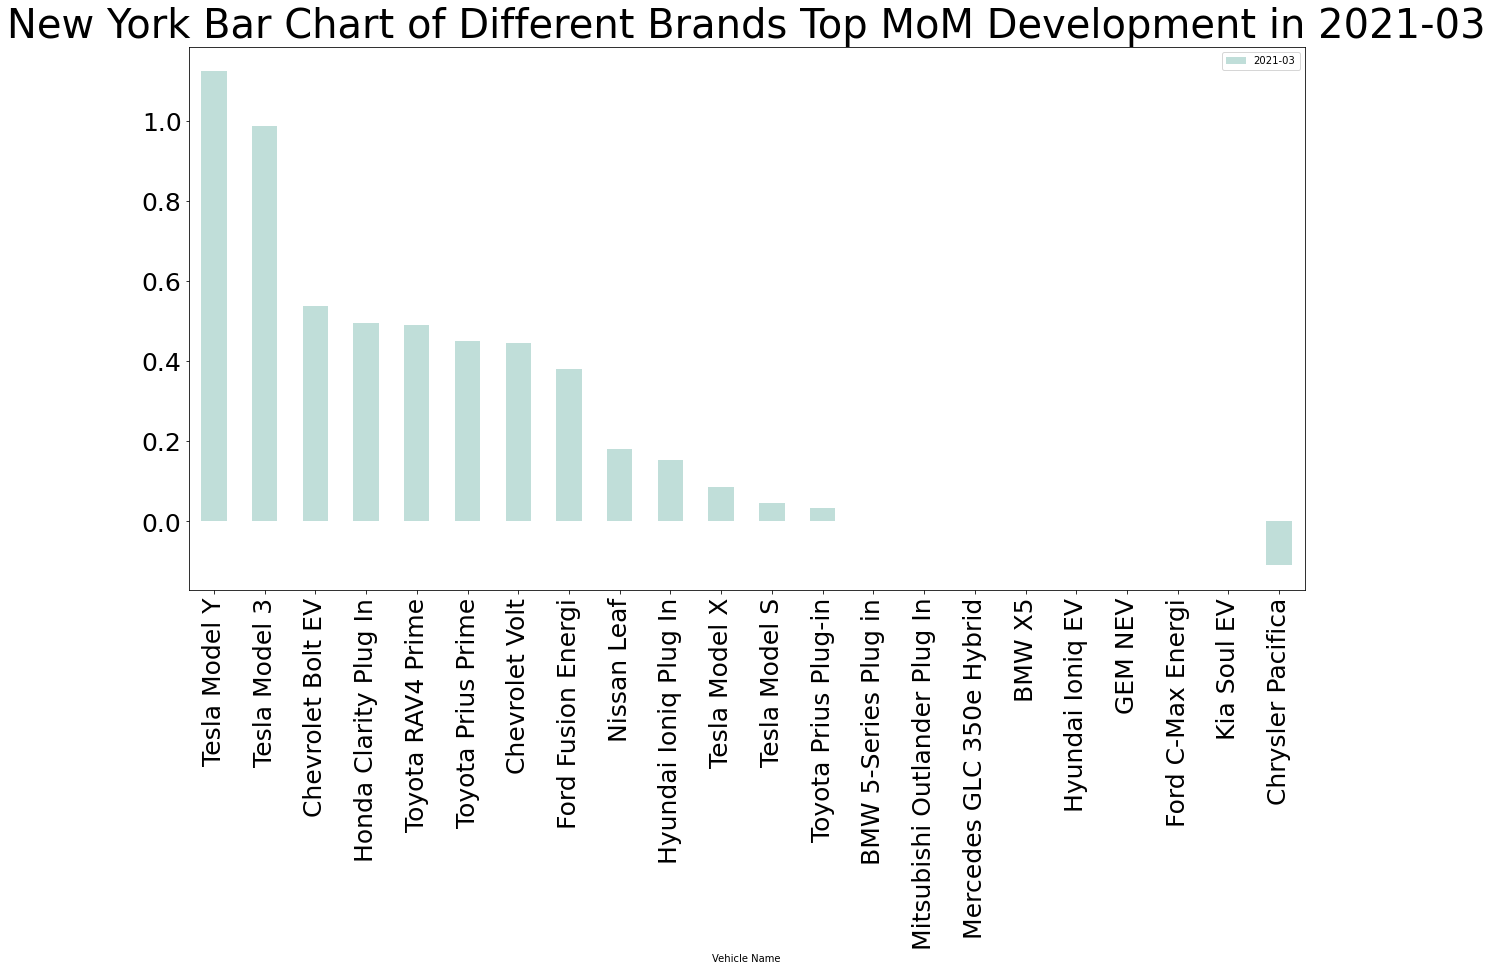

In [140]:
plot_mom(ny_df_recently, '2021-03', 1000, 'New York')

In New York State, Nissan Leaf and Toyota RAV4 Prime start to keep up with Tesla. They have a great potential to gain more customers and advocators, probably because of their good word of mouth as time goes by.

### Texas State

In [142]:
tx_df = pd.read_csv('data/ny_ev_registrations_public.csv')
tx_df.head(10)

,ZIP Code,Registration Valid Date,VIN Prefix,DMV ID,DMV Snapshot,VIN Model Year,Registration Expiration Date,State,Vehicle Name,Technology
0,11797,2020-02-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-12-19,NY,Tesla Model X,BEV
1,11215,2018-09-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-20,NY,Tesla Model X,BEV
2,11040,2018-12-03,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2021-01-08,NY,Tesla Model X,BEV
3,11215,2018-09-30,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-29,NY,Tesla Model X,BEV
4,11976,2018-09-11,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-09,NY,Tesla Model X,BEV
5,10024,2018-08-08,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-07,NY,Tesla Model X,BEV
6,11231,2018-06-28,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV
7,12501,2018-09-17,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV
8,11720,2018-06-29,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-28,NY,Tesla Model X,BEV
9,14202,2018-06-28,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV


In [143]:
tx_df, tx_df_recently = preprocess_dataframe(tx_df, [2015, 1, 1])
tx_df_month = get_monthly_report(tx_df)

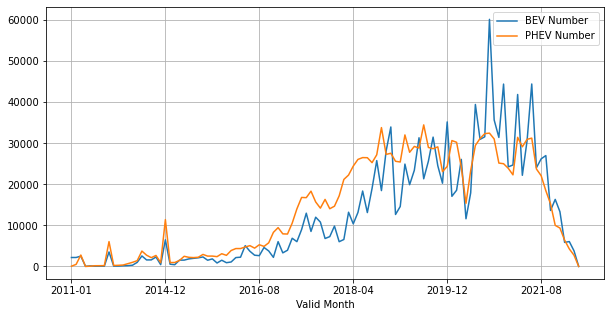

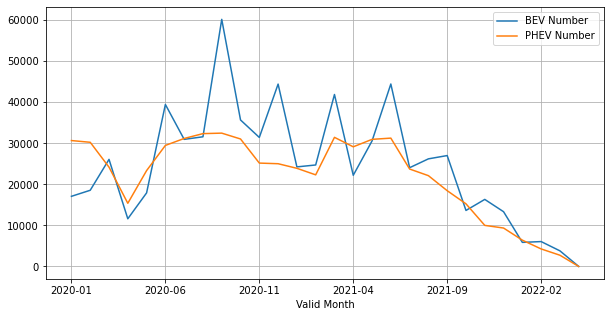

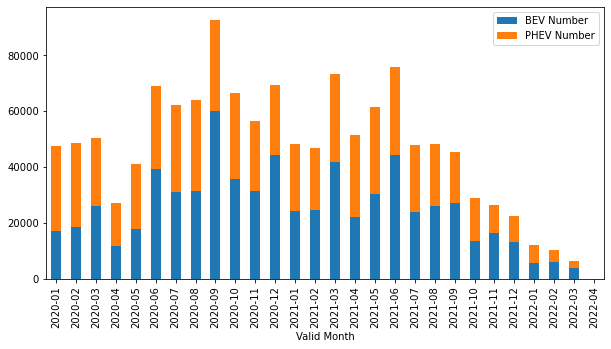

In [144]:
draw_month_report(tx_df_month)

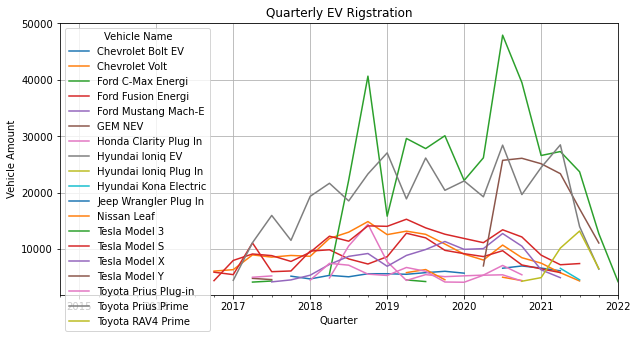

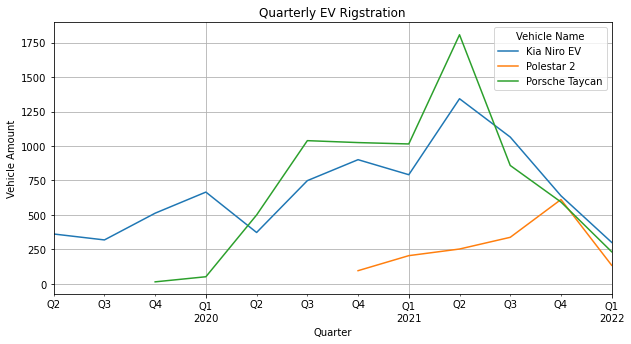

In [145]:
draw_vehicle_quarterly_data(tx_df, [], 4000)
draw_vehicle_quarterly_data(tx_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])

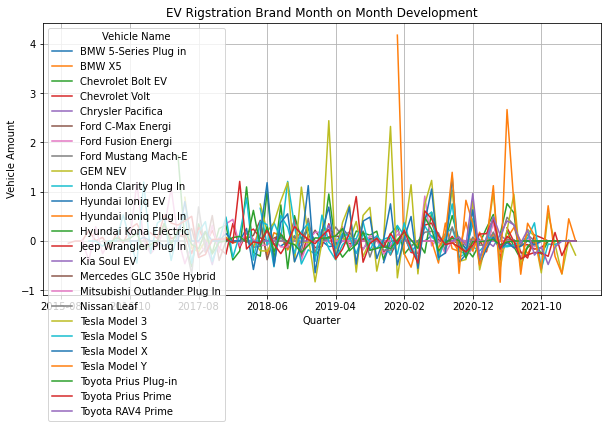

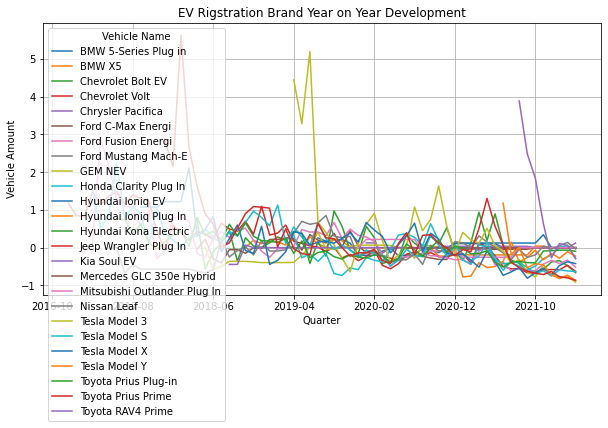

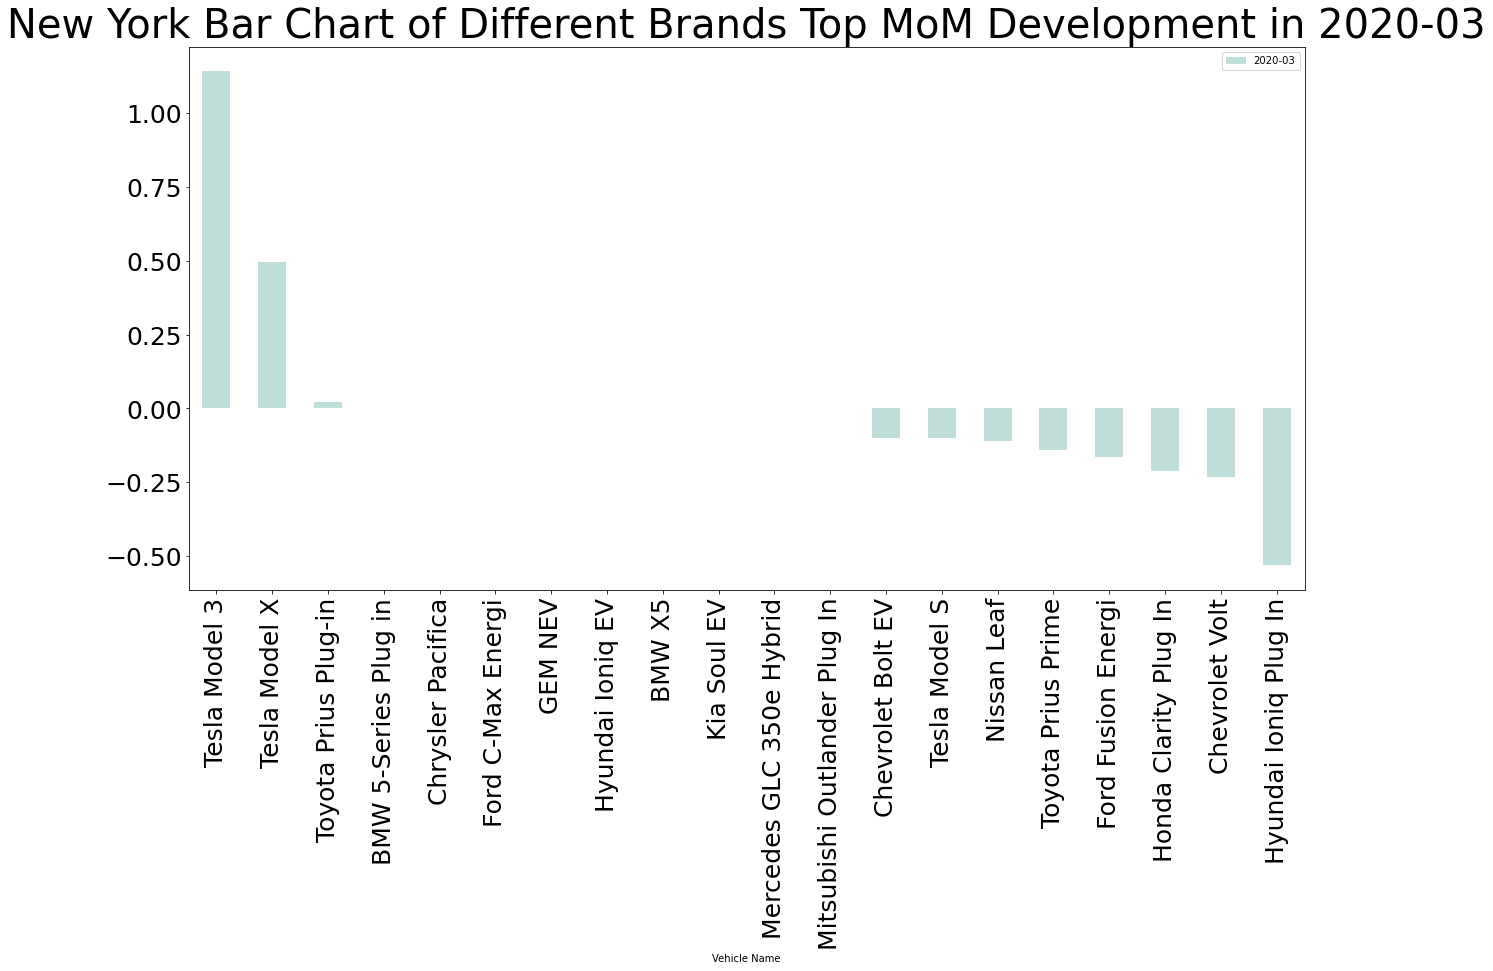

In [146]:
plot_mom(tx_df_recently, '2020-03', 1000, 'New York')

## Summary
In conclusion, we can confirm that Development trends for different electric vehicles are inconsistent. And different types of EV, different states also have different results. Tesla now is the most progressive make in the EV market of these months, however, some new brands and makes are starting to make their mark in our sights. In other words, Tesla is facing some Crises and Challenges now.